**Understanding industry classifications**

1. we must first understand what industry classification is best to use and the nuances between each one.

In [5]:
import pandas as pd

# Set paths here C:\Users\clint\Desktop\compstak-ra\src\exploration_1.ipynb
#C:\Users\clint\Desktop\compstak-ra\data\data\university-of-british-columbia-leases-2025-04-02.csv
#C:\Users\clint\Desktop\compstak-ra\data\data\university-of-british-columbia-sales-2025-04-02.csv
#C:\Users\clint\Desktop\compstak-ra\data\data\cb_2018_us_state_5m\cb_2018_us_state_5m.shp
path = 'C:/Users/clint/Desktop/data/data/'
path_census = 'C:/Users/clint/Desktop/data/cb_2018_us_state_5m/'

# Load the data
sales = pd.read_csv(path + 'university-of-british-columbia-sales-2025-04-02.csv')
leases = pd.read_csv(path + 'university-of-british-columbia-leases-2025-04-02.csv')

C:\Users\clint\AppData\Local\Temp\ipykernel_23180\2022255339.py:11: DtypeWarning: Columns (8,52,73,77) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv(path + 'university-of-british-columbia-sales-2025-04-02.csv')
C:\Users\clint\AppData\Local\Temp\ipykernel_23180\2022255339.py:12: DtypeWarning: Columns (15,35,37,59,61,67,71,73,76,77,78,80,82,85) have mixed types. Specify dtype option on import or set low_memory=False.
  leases = pd.read_csv(path + 'university-of-british-columbia-leases-2025-04-02.csv')


In [9]:
# Isolate industry categorization columns from the compstak dataset
def isolate_industry_categories(df, df_name='DataFrame'):
    # Select only the columns related to property and tenant industry categories
    industry_columns = [
        'Property Type',
        'Property Subtype',
        'Space Type',
        'Tenant SIC Code',
        'Tenant SIC Description',
        'Tenant NAICS Code',
        'Tenant NAICS Description'
    ]
    
    # Filter columns that actually exist in the dataframe
    available_columns = [col for col in industry_columns if col in df.columns]
    skipped_columns = [col for col in industry_columns if col not in df.columns]
    
    if not available_columns:
        print(f"No industry category columns found in the {df_name} dataframe!")
        return None
    
    # Create a new dataframe with only these columns
    industry_df = df[available_columns].copy()
    
    # Display basic information about these columns
    print(f"\n--- {df_name} Analysis ---")
    print(f"Total records: {len(industry_df)}")
    
    # Report on skipped columns
    if skipped_columns:
        print(f"Skipped columns in {df_name} (not found in dataframe): {', '.join(skipped_columns)}")
        
    print(f"Available columns in {df_name}:")
    for col in available_columns:
        non_null = industry_df[col].count()
        percent_filled = (non_null / len(industry_df)) * 100
        unique_values = industry_df[col].nunique()
        print(f"{col}: {percent_filled:.1f}% filled, {unique_values} unique values")
    
    # Store metadata in the dataframe attributes
    industry_df.attrs['skipped_columns'] = skipped_columns
    industry_df.attrs['df_name'] = df_name
    
    return industry_df

# Apply to both datasets with dataset names
sales_industry = isolate_industry_categories(sales, df_name='Sales')
leases_industry = isolate_industry_categories(leases, df_name='Leases')

# Show a sample of records
if leases_industry is not None:
    print("\n--- Sample Lease Records ---")
    display(leases_industry.head())

    # For analysis: common property types and subtypes
    if 'Property Subtype' in leases_industry.columns:
        print("\nMost common Property Subtypes in Leases:")
        display(leases_industry['Property Subtype'].value_counts().head(10))

    # For analysis: examine relationship between SIC and NAICS codes
    sic_naics_cols = ['Tenant SIC Code', 'Tenant SIC Description', 'Tenant NAICS Code', 'Tenant NAICS Description']
    available_sic_naics = [col for col in sic_naics_cols if col in leases_industry.columns]
    
    if len(available_sic_naics) >= 2:  # Only if we have at least a pair of SIC/NAICS columns
        print("\nSample industry categorizations from Leases:")
        sample_industries = leases_industry.dropna(subset=[col for col in available_sic_naics if 'Code' in col]).head(10)
        display(sample_industries[available_sic_naics])

# Print comprehensive summary of skipped columns by dataset
print("\n--- SUMMARY OF SKIPPED COLUMNS BY DATASET ---")
if sales_industry is not None and sales_industry.attrs.get('skipped_columns'):
    print(f"Sales dataset: {', '.join(sales_industry.attrs['skipped_columns'])}")
elif sales_industry is not None:
    print("Sales dataset: No columns were skipped")
else:
    print("Sales dataset: No columns available")

if leases_industry is not None and leases_industry.attrs.get('skipped_columns'):
    print(f"Leases dataset: {', '.join(leases_industry.attrs['skipped_columns'])}")
elif leases_industry is not None:
    print("Leases dataset: No columns were skipped")
else:
    print("Leases dataset: No columns available")


--- Sales Analysis ---
Total records: 563653
Skipped columns in Sales (not found in dataframe): Space Type, Tenant SIC Code, Tenant SIC Description, Tenant NAICS Code, Tenant NAICS Description
Available columns in Sales:
Property Type: 94.9% filled, 8 unique values
Property Subtype: 74.4% filled, 56 unique values

--- Leases Analysis ---
Total records: 1168997
Skipped columns in Leases (not found in dataframe): Tenant SIC Code, Tenant SIC Description, Tenant NAICS Code, Tenant NAICS Description
Available columns in Leases:
Property Type: 99.0% filled, 8 unique values
Property Subtype: 65.5% filled, 56 unique values
Space Type: 99.9% filled, 6 unique values

--- Sample Lease Records ---
Property Subtype: 65.5% filled, 56 unique values
Space Type: 99.9% filled, 6 unique values

--- Sample Lease Records ---


,Property Type,Property Subtype,Space Type
0,Office,Medical/Healthcare,Office
1,Office,Medical/Healthcare,Office
2,Office,Medical/Healthcare,Office
3,Office,Medical/Healthcare,Office
4,Office,Medical/Healthcare,Office



Most common Property Subtypes in Leases:


Property Subtype
Medical/Healthcare              139366
Warehouse/Distribution          132875
Flex/R&D                        112559
Mixed-Use                        67369
General Retail                   34198
Super-Regional Center/Mall       30946
Business Park                    19554
Life Science/Lab                 18717
Neighborhood Shopping Center     17611
Manufacturing                    17365
Name: count, dtype: int64


--- SUMMARY OF SKIPPED COLUMNS BY DATASET ---
Sales dataset: Space Type, Tenant SIC Code, Tenant SIC Description, Tenant NAICS Code, Tenant NAICS Description
Leases dataset: Tenant SIC Code, Tenant SIC Description, Tenant NAICS Code, Tenant NAICS Description



--- PROPERTY TYPE VISUALIZATIONS ---
Generating visualizations for Leases dataset...


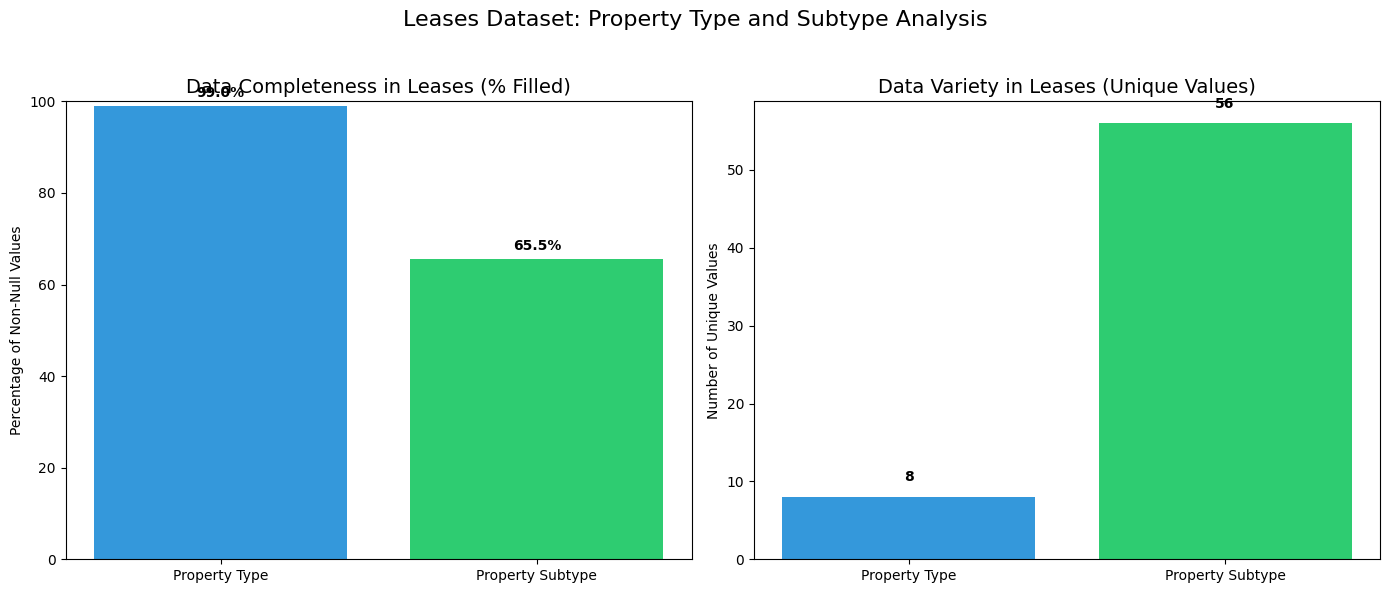

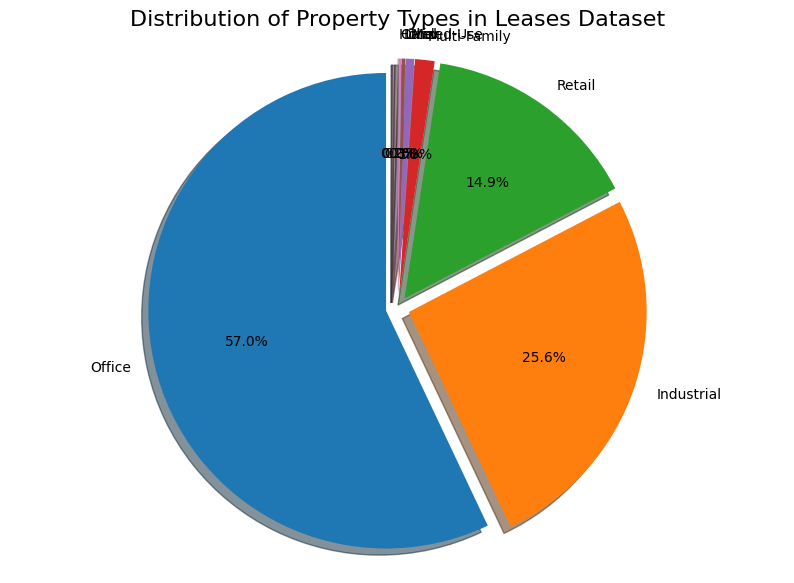

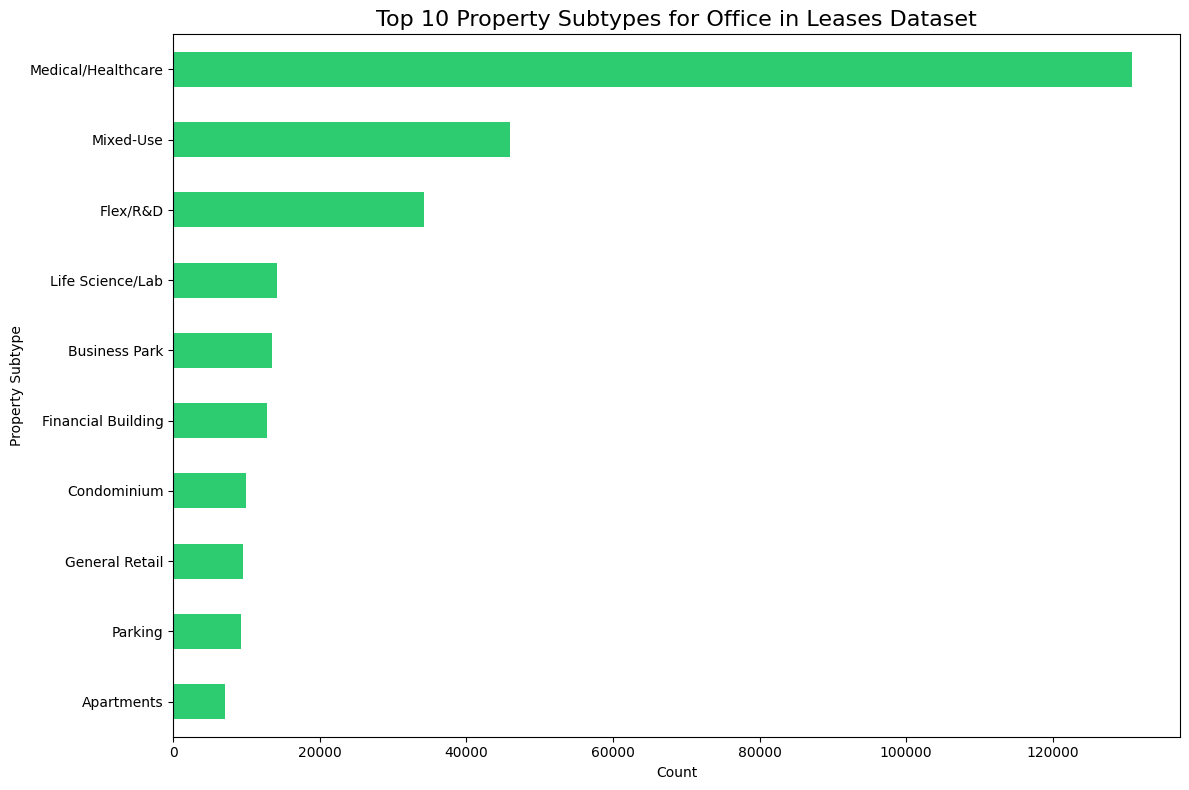


Generating visualizations for Sales dataset...


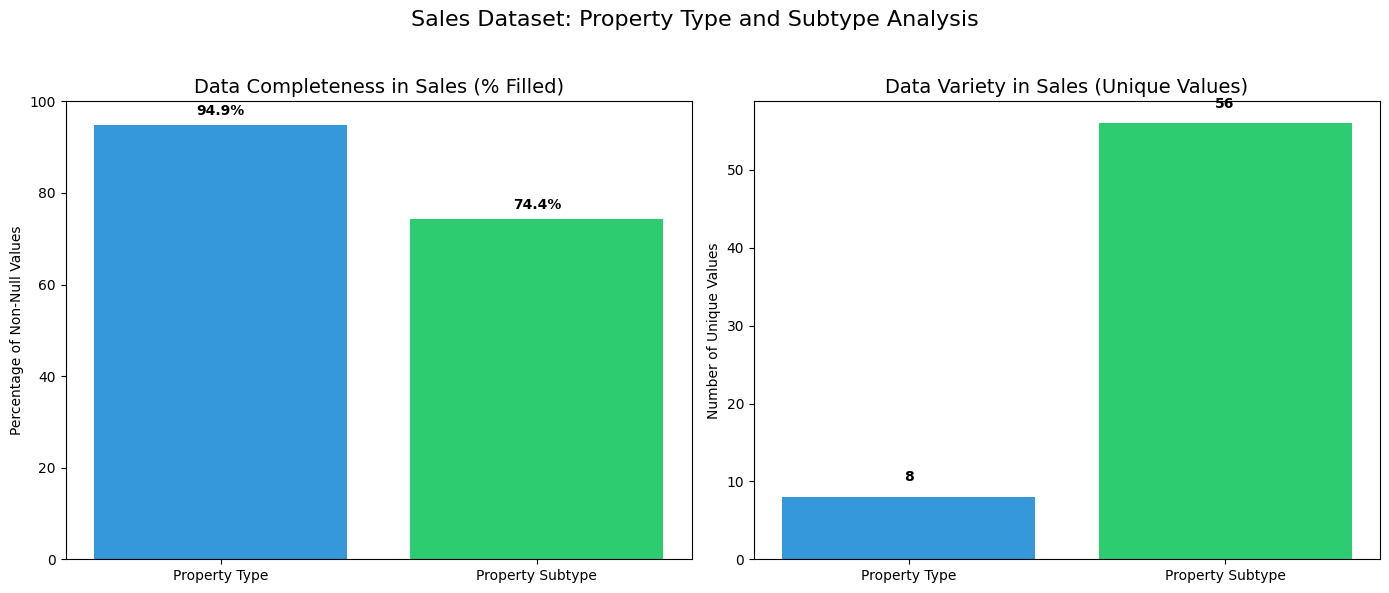

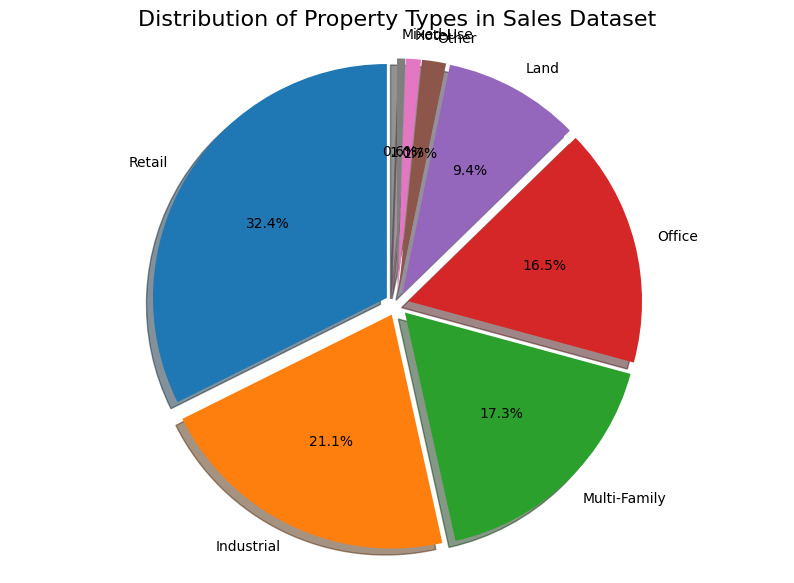

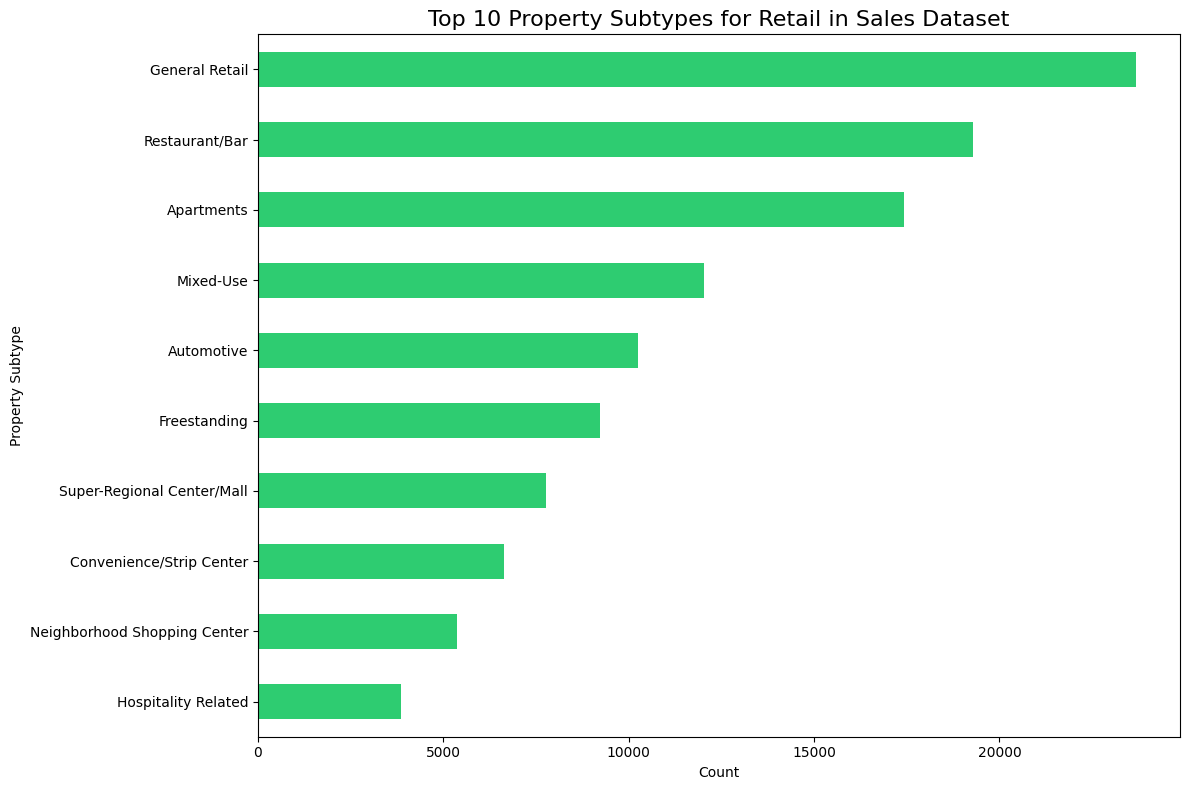

In [11]:
# Visualize the Property Type and Property Subtype data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to create visualizations for either leases or sales data
def visualize_property_data(industry_df, df_name):
    if industry_df is None or 'Property Type' not in industry_df.columns:
        print(f"No suitable property data found in {df_name} dataset.")
        return
        
    # Get actual metrics from the dataframe
    total_records = len(industry_df)
    
    # Calculate fill rates (% non-null values)
    pt_filled = industry_df['Property Type'].count() / total_records * 100
    pt_unique = industry_df['Property Type'].nunique()
    
    categories = ['Property Type']
    fill_rates = [pt_filled]
    unique_values = [pt_unique]
    
    # Add Property Subtype if available
    if 'Property Subtype' in industry_df.columns:
        ps_filled = industry_df['Property Subtype'].count() / total_records * 100
        ps_unique = industry_df['Property Subtype'].nunique()
        categories.append('Property Subtype')
        fill_rates.append(ps_filled)
        unique_values.append(ps_unique)
    
    # Set up figure with two subplots - one for fill rates and one for unique values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f'{df_name} Dataset: Property Type and Subtype Analysis', fontsize=16)
    
    # Plot 1: Fill rates (percentage of non-null values)
    ax1.bar(categories, fill_rates, color=['#3498db', '#2ecc71'] if len(categories) > 1 else ['#3498db'])
    ax1.set_ylim([0, 100])
    ax1.set_title(f'Data Completeness in {df_name} (% Filled)', fontsize=14)
    ax1.set_ylabel('Percentage of Non-Null Values')
    # Add data labels on top of bars
    for i, v in enumerate(fill_rates):
        ax1.text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')
    
    # Plot 2: Unique values count
    ax2.bar(categories, unique_values, color=['#3498db', '#2ecc71'] if len(categories) > 1 else ['#3498db'])
    ax2.set_title(f'Data Variety in {df_name} (Unique Values)', fontsize=14)
    ax2.set_ylabel('Number of Unique Values')
    # Add data labels on top of bars
    for i, v in enumerate(unique_values):
        ax2.text(i, v + 2, f'{v}', ha='center', fontweight='bold')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    # Create a pie chart showing the distribution of Property Types
    plt.figure(figsize=(10, 7))
    property_type_counts = industry_df['Property Type'].value_counts()
    # Limit to top 8 categories if there are more
    if len(property_type_counts) > 8:
        other_count = property_type_counts[8:].sum()
        top_counts = property_type_counts.iloc[:8]
        top_counts['Other'] = other_count
        property_type_counts = top_counts
    
    # Create pie chart
    plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', 
            shadow=True, startangle=90, explode=[0.05]*len(property_type_counts))
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(f'Distribution of Property Types in {df_name} Dataset', fontsize=16)
    plt.show()
    
    # Show property subtypes for the most common property type if available
    if 'Property Subtype' in industry_df.columns:
        most_common_type = property_type_counts.index[0]
        subtypes = industry_df[industry_df['Property Type'] == most_common_type]['Property Subtype'].value_counts()
        
        if len(subtypes) > 0:  # Only if we have subtypes for this property type
            # Show top 10 subtypes as horizontal bar chart
            plt.figure(figsize=(12, 8))
            subtypes.head(10).sort_values().plot(kind='barh', color='#2ecc71')
            plt.title(f'Top 10 Property Subtypes for {most_common_type} in {df_name} Dataset', fontsize=16)
            plt.xlabel('Count')
            plt.tight_layout()
            plt.show()

# Create visualizations for both datasets
print("\n--- PROPERTY TYPE VISUALIZATIONS ---")
print("Generating visualizations for Leases dataset...")
visualize_property_data(leases_industry, 'Leases')

print("\nGenerating visualizations for Sales dataset...")
visualize_property_data(sales_industry, 'Sales')